# Loss function

The **loss function** measures a models prediction error. 

More specifically it calculates the difference between the models prediction and the true label (classification problem) or true value (regression problem). 

The loss function is also called **error function** or **cost function**. 

When we talk about "training the model" or "optimizing the model" we actually mean minimizing the loss function.

Let $\hat y = f(x)$ be a model where $x$ is the input and $\hat y$ is the predicted value. 

Let $L(y, \hat y) = L(y, f(x))$ be the loss function for a single example $x$, where $y$ is the true label or true value.

The loss is always positive, and should be zero only for cases where the network’s output is correct.

The loss of a set of examples $x = \{x_1,...,x_n\}$ is the average of the individual losses:

$$
L = \frac{1}{N}\sum_{i=1}^N L(\hat y_i, y_i)
$$

Note that the loss does not have a unit, it is just a number.

The loss functions is useful because:
 * It provides a measure for model performance
 * It helps to monitor the training progress
   * if the loss does not change any more the model has stopped learning
   * if the loss is very volatile the learning process is unstable
 * It allows to select the best model from a set of model snapshots
 * The gradient of the loss function informs the optimizer how to update model parameters to reduce the prediction error.
 
There are many different loss functions available, the choice depends on the type of prediction problem. 

We will look at the following loss functions:

 * Cross-entropy loss
 * Mean squared error (MSE)
 * Mean average error (MAE)

## Cross-entropy loss

The **cross-entropy loss** is used when a model outputs a binominal or multinomial probability distribution. 

This loss function is usually used in **classification problems**.

Given an example $x$ let $y = [y_1,...,y_n]$ be a vector representing the true multinomial distribution and let $ \hat y = [\hat y_1,..., \hat y_n]$ be the networks output that has been transformed by the *softmax* function. 

In general the cross entropy loss measures the **dissimilarity** between the distributions $y$ and $\hat y$.

It is defined as:

$$
L(y, \hat y) = - y \cdot log(\hat y) = - \sum_{i=1}^n y_i \ log(\hat y_i)
$$

Note that $\cdot$ is the dot product.

Because each example $x$ has a single true label, $y$ is a **one-hot** vector. 

For example if there are 5 classes and the true label is 2 than $ y = [0, 1, 0, 0, 0]$.

Because $y$ is a one-hot vector the cross-entropy can be simplified to:

$$
L(y, \hat y) = - log(\hat y_t)
$$

where t is the true label.

The cross entropy loss depends only on the probability of the correct class. 

The loss is independent of how the remaining probability is split between incorrect classes.

Lets look at a Python example how cross-entropy loss is calculated:


In [1]:
import numpy as np

def cross_entropy(y, y_hat):
    return -np.dot(y, np.log(y_hat))

def one_hot(label, nb_classes):
    y = np.zeros(nb_classes)
    y[label] = 1
    return y

# lets y_hat be a model prediction for some input x
y_hat = np.array([0.7, 0.2, 0.1])
nb_classes = y_hat.shape[0]

# calculate the loss for different true labels
print('y_hat = %s' % y_hat)
print()
for i in range(nb_classes):
    y = one_hot(i, nb_classes)
    print('true_label = %i' % i)
    print('P(y=%d|x) = %.2f' % (i, y_hat[i]))
    print('cross entropy loss = %.4f' % cross_entropy(y, y_hat))
    print()

y_hat = [0.7 0.2 0.1]

true_label = 0
P(y=0|x) = 0.70
cross entropy loss = 0.3567

true_label = 1
P(y=1|x) = 0.20
cross entropy loss = 1.6094

true_label = 2
P(y=2|x) = 0.10
cross entropy loss = 2.3026



Because the scores $\hat y$ have been transformed using the *softmax* function and represent a conditional probability distribution, increasing the probability of the correct class means decreasing the mass assigned to all the other classes.

**Note:** The input to a cross-entropy loss must be a probability distribution. It can not be used with unnormalized scores: 
 * the log function is not defined for negative numbers
 * for scores > 1 the loss becomes negative.

Lets take a look at a plot of the cross-entropy loss:

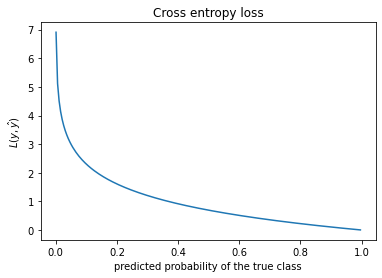

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y_hat_t = np.arange(0.001, 1.0, 0.005)
loss = -np.log(y_hat_t)
plt.plot(y_hat_t, loss)
plt.title('Cross entropy loss')
plt.ylabel('$L(y,\hat y)$')
plt.xlabel('predicted probability of the true class')
plt.show()

We can see from the plot that the cross-entropy loss behaves as expected. When the predicted probability of the true class goes to 1 the loss goes to 0. When the predicted probability of the true class goes to 0, the loss goes to infinity.


So far we have looked at cross-entropy loss for a multi-class classification problem.

Now lets look how cross-entropy loss is calculated for a **binary classification** problem.

In this case the network ouput is transformed by a **sigmoid function**. 

The true label $y \in [0,1]$ and $\hat y = p(y=1 \mid x)$ are scalars.


 

In this case the cross entropy is calculated like this:

$$
L(y, \hat y) = -y \ log(\hat y) + (1-y) \ log(1-\hat y)
$$

Notice that the terms $-y$ and $(1-y)$ are **indicator functions**.

One indicator function always evaluates to 1 and the other evaluates to 0, this switches between the two loss terms.

Lets plot the loss function for the two cases:

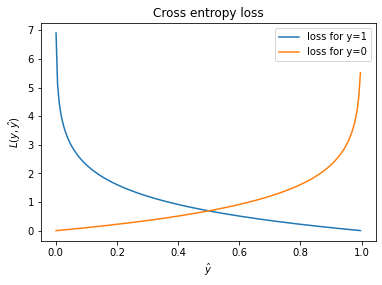

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y_hat = np.arange(0.001, 1.0, 0.005)
loss_y_is_one = -np.log(y_hat)
loss_y_is_zero = -np.log(1 - y_hat)
plt.plot(y_hat, loss_y_is_one, label='loss for y=1')
plt.plot(y_hat, loss_y_is_zero, label='loss for y=0')

plt.title('Cross entropy loss')
plt.ylabel('$L(y,\hat y)$')
plt.xlabel('$\hat y$')
plt.legend()
plt.show()

Again the cross entropy loss behaves as expected
 * For the case $y=1$ the loss goes to 0 when $\hat y$ goes to 1
 * For the case $y=0$ the loss goes to 0 when $\hat y$ goes to 0

## Mean Square Error (MSE)

Mean Square Error (MSE) is commonly used as loss function for regression problems. 

Keep in mind that for regression problems the model output is simply a scalar and not a probability.

MSE is the sum of squared distances between the target values and predicted values.

$$
MSE(y, \hat y) = \frac{1}{N} \sum_i^N(y_i - \hat y_i)^2
$$

MSE is also called L2 loss.


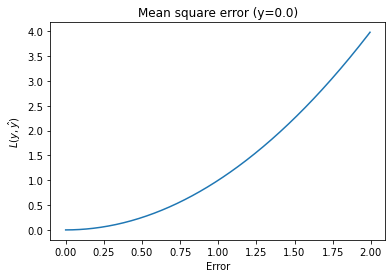

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.0, 2.0, 0.005)
y = x**2
plt.plot(x,y)
plt.title('Mean square error (y=0.0)')
plt.ylabel('$L(y,\hat y)$')
plt.xlabel('Error')
plt.show()

The nice thing about MSE is that during optimization the parameter updates are getting smaller as we are getting nearer to the minimum. 

The problem is that the loss function is sensitive to outlier examples because of the squared term.

## Mean absolute error (MAE)

Mean Absolute Error (MAE) is another loss function used for regression problems. 

MAE is the sum of absolute differences between the target values and predicted values.

$$
MAE(y, \hat y) = \frac{1}{N} \sum_i^N \mid y_i - \hat y_i \mid
$$

MAE is also called L1 loss.


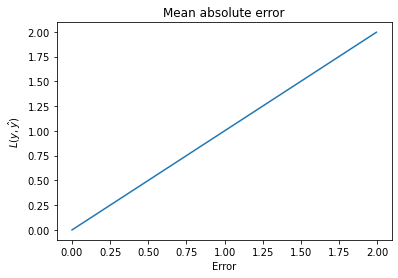

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.0, 2.0, 0.005)
y = abs(x)
plt.plot(x,y)
plt.title('Mean absolute error')
plt.ylabel('$L(y,\hat y)$')
plt.xlabel('Error')
plt.show()

Compared to MSE, MAE is not sensitive to outliers in the train data.